## Genomics and High-Dimensional Data: Written Analysis, Peer Review and Discussion

### Problem 2

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#### Data Preparation

In [2]:
# Load the data
dataset = np.load("./data/p2_unsupervised/X.npy")

# Take the log 2 transform of the data
dataset = np.log2(dataset + 1)

# Number of cells (rows) and genes (columns)
n_cells, n_genes = dataset.shape
print(f"Number of cells: {n_cells}")
print(f"Number of genes: {n_genes}")

# Value of the largest entry in the first column of the transformed data
largest_entry_first_col = np.max(dataset[:, 0])
print(f"Largest entry in the first column of the transformed data: {largest_entry_first_col}")

Number of cells: 2169
Number of genes: 45768
Largest entry in the first column of the transformed data: 5.972169178513185


#### Part 1: Visualization

A scientist tells you that cells in the brain are either excitatory neurons, inhibitory neurons, or non-neuronal cells. Cells from each of these three groups serve different functions within the brain. Within each of these three types, there are numerous distinct sub-types that a cell can be, and sub-types of the same larger class can serve similar functions. Your goal is to produce visualizations which show how the scientist's knowledge reflects in the data.

1. (3 points) Provide at least one visualization which clearly shows the existence of three main brain cell types as described by the scientist, and explain how it shows this. Your visualization should support the idea that cells from a different group (for example, excitatory vs inhibitory) can differ greatly.

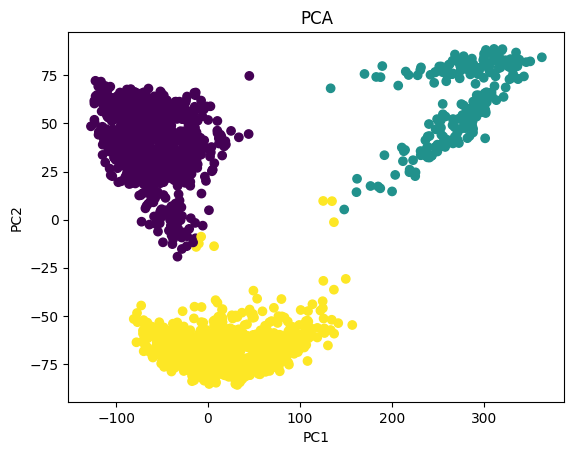

In [5]:
# ===================== PCA ==================== #

# Initialize the PCA, MDS, and t-SNE models
pca = PCA(n_components=2)

# Fit the models to the data
data_pca_fit = pca.fit(dataset)

# Transform the data using the models
data_transform_pca = data_pca_fit.transform(dataset)

# =================== KMEANS =================== #

# Initialize the KMeans model
# (We expect 3 cell types in the data, so we set n_clusters=3)
kmeans = KMeans(n_clusters=3, n_init=10)

# Fit the model to the data
kmeans_fit = kmeans.fit(dataset)

# Predict the cluster labels of the data
kmeans_labels = kmeans_fit.predict(dataset)

# ==================== PLOT ==================== #

# Plot the first two principal components of the PCA transform
plt.scatter(
    data_transform_pca[:, 0],
    data_transform_pca[:, 1],
    c=kmeans_labels,
)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA")
plt.show()

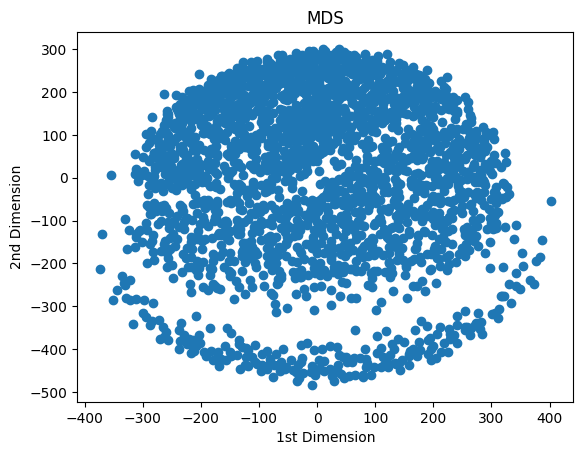

In [8]:
# ==================== MDS ==================== #

# Fit the data using MDS
mds_model = MDS(
    n_components=2,
    n_init=10,
    normalized_stress="auto",
    eps=1e-5
)
mds_fit = mds_model.fit(dataset)

# ==================== PLOT ==================== #

# Plot the first two principal components of the MDS transform
plt.scatter(
    mds_fit.embedding_[:, 0],
    mds_fit.embedding_[:, 1],
)
plt.xlabel("1st Dimension")
plt.ylabel("2nd Dimension")
plt.title("MDS")
plt.show()

- The visualization that more clearly displays the existence of 3 separate clusters is the plot of the first two principal components of the data. The PCA plot very clearly shows 3 distinct clusters that, despite a couple of outliers, are very easily separable. This is proven even more by the fact that by running the kmeans algorithm on the data, the resulting labels very closely match the perceived 3 clusters. The MDS plot could also be argued that it shows 3 clusters, but 2 of the three clusters are very close together. Since the chosen visualization should "support the idea that cells from a different group can differ greatly", the PCA plot is the better choice.

2. (4 points) Provide at least one visualization which supports the claim that within each of the three types, there are numerous possible sub-types for a cell. In your visualization, highlight which of the three main types these sub-types belong to. Again, explain how your visualization supports the claim.

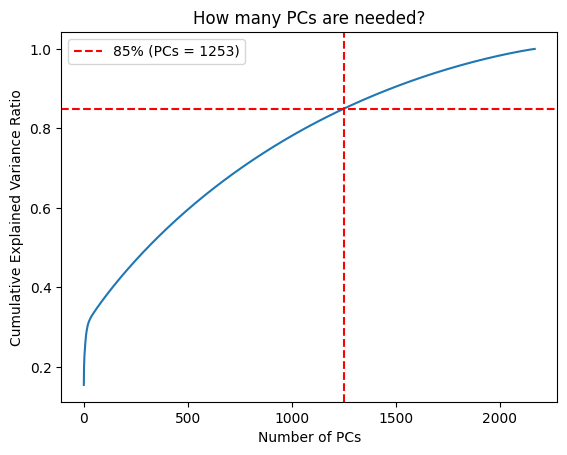

In [6]:
# ===== CUMULATIVE EXPLAINED VARIANCE RATIO ==== #

# Fit the data using PCA without limiting the number of PCs
data_pca_fit = PCA().fit(dataset)

# Get the cumulative explained variance ratio
cumulative_explained_variance_ratio = np.cumsum(data_pca_fit.explained_variance_ratio_)

# Plot the cumulative explained variance ratio
plt.plot(cumulative_explained_variance_ratio)

# Plot a horizontal line at 0.85
plt.axhline(y=0.85, color="r", linestyle="--")

# Get the number of PCs needed to explain 85% of the variance
n_pcs = np.argmax(cumulative_explained_variance_ratio >= 0.85) + 1

# Plot a vertical line at the number of PCs needed to explain 85% of the variance
plt.axvline(
    x=n_pcs, 
    color="r", 
    linestyle="--",
    label=f"85% (PCs = {n_pcs})",
)

# Label the axes
plt.xlabel("Number of PCs")
plt.ylabel("Cumulative Explained Variance Ratio")
plt.title("How many PCs are needed?")
plt.legend()
plt.show()

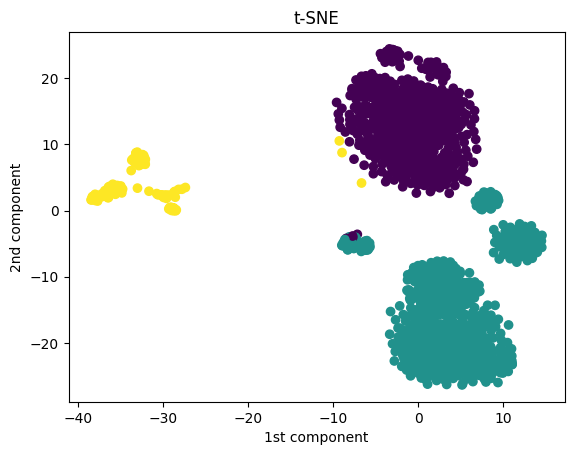

In [10]:
# ==================== TSNE ==================== #

# The dataset has way too many features. We bring them down to the number of 
# PCs needed to explain 85% of the variance using PCA
post_tsne_pca_fit = PCA(n_components=1250).fit(dataset)

# We fit the t-SNE model to the PCA-transformed data
tsne_fit = TSNE(n_components=2, perplexity=40).fit(post_tsne_pca_fit.transform(dataset))

# =================== KMEANS =================== #

# Initialize the KMeans model
# (We expect 3 cell types in the data, so we set n_clusters=3)
kmeans_model = KMeans(
    n_clusters=3, 
    n_init=10
)

# Fit the model to the data
kmeans_fit = kmeans_model.fit(post_tsne_pca_fit.transform(dataset))

# Predict the cluster labels of the data
kmeans_labels = kmeans_fit.predict(post_tsne_pca_fit.transform(dataset))

# ==================== PLOT ==================== #

# Plot the first two components of the t-SNE transform
plt.scatter(
    tsne_fit.embedding_[:, 0],
    tsne_fit.embedding_[:, 1],
    c=kmeans_labels,
)
plt.xlabel("1st component")
plt.ylabel("2nd component")
plt.title("t-SNE")
plt.show()


- The t-SNE visualization clearly supports the claim that within the three main cell types there are small possible sub-types. Once I accounted for the proper number of principal components to use for the first step of the dimensionality reduction (by calculating the number of principal components that explain 85% of the total variance), the t-SNE plot started displaying 3 distinct clusters that are clearly separated, with the difference (compared to the PCA plot presented previously) that it also shows the appearance of other smaller sub-clusters within each of the 3 main clusters. The perfect example of this is the cluster circled in red in the image below, as it is made up of a cluster of 3 or so "islands" or "sub-groups" placed close to each other. Each of those "islands" could be considered a sub-type of cell, supporting the initial claim.

![Alt text](images/islands.png)

#### Part 2: Unsupervised Feature Selection

Now we attempt to find informative genes which can help us differentiate between cells, using only unlabeled data. A genomics researcher would use specialized, domain-specific tools to select these genes. We will instead take a general approach using logistic regression in conjunction with clustering. Briefly speaking, we will use the p2_unsupervised dataset to cluster the data. Treating those cluster labels as ground truth, we will fit a logistic regression model and use its coefficients to select features. Finally, to evaluate the quality of these features, we will fit another logistic regression model on the training set in p2_evaluation, and run it on the test set in the same folder.

1. (4 points) Using your clustering method(s) of choice, find a suitable clustering for the cells. Briefly explain how you chose the number of clusters by appropriate visualizations and/or numerical findings.

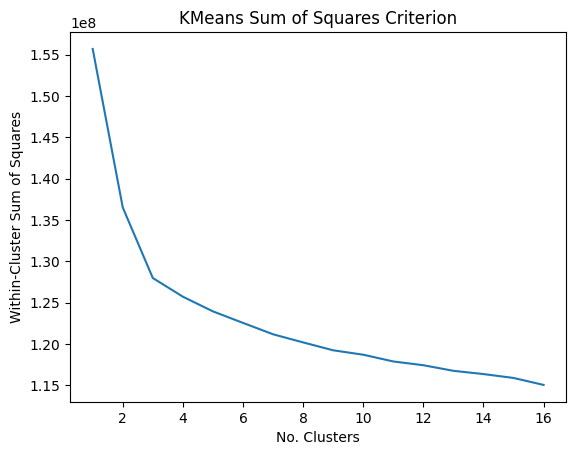

In [17]:
# ========== SUM OF SQUARES CRITERION ========== #

# Number of clusters to try
num_clusters = 16

# Compile the results of running the KMeans algorithm with different numbers of clusters
# Warning: This section will take a while to run (in my machine it took ~45 minutes)
all_kmeans = [
    KMeans(n_clusters=i+1, n_init=100) for i in range(num_clusters)
]

# Fit the data to each of the KMeans models and store the resulting "inertia"
inertias = [
    kmeans_model.fit(dataset).inertia_ for kmeans_model in all_kmeans
]


# ==================== PLOT ==================== #

plt.plot(
    np.arange(1, num_clusters + 1),
    inertias
)
plt.title("KMeans Sum of Squares Criterion")
plt.xlabel("No. Clusters")
plt.ylabel("Within-Cluster Sum of Squares")
plt.show()

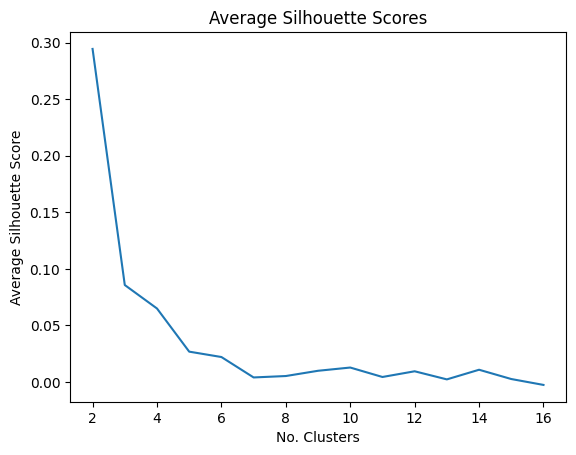

In [16]:
# ============== SILHOUETTE SCORE ============== #

# Note: Remember that the Silhouette score is undefined for the class "1" so you need to 
# evaluate the score for the cluster 2 onwards (or cluster 1 in Python indexing terms)
avg_silhouette_scores = [
    silhouette_score(dataset, all_kmeans[i].labels_) for i in range(1, num_clusters)
]

# ==================== PLOT ==================== #

plt.plot(
    np.arange(2, num_clusters+1),
    avg_silhouette_scores
)
plt.title("Average Silhouette Scores")
plt.xlabel("No. Clusters")
plt.ylabel("Average Silhouette Score")
plt.show()

- The number of clusters was chosen using the sum of squares criterion for the KMeans algorithm, since the dataset at hand has more than 45000 features and in the recitation it was mentioned that the Silhouette score is not a good metric for high dimensional data. The Silhouette score was still plotted, but the projected number of ideal clusters was unlikely as it suggested 2. The sum of squares criterion plot, on the other hand, showed an elbow (see graph above) at `k=3` or an ideal number of clusters of 3. This seems more reasonable as it matches the previous statement from a scientist that we got in the first part of the problem 2: There are 3 types of neuron - Excitatory neurons, inhibitory neurons and non-neuronal cells. This will be the number of clusters used.

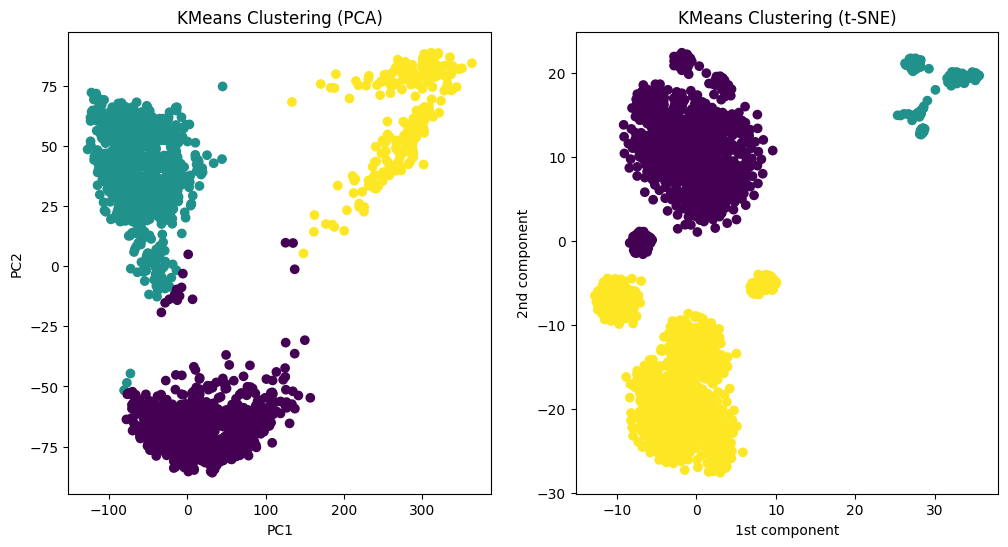

In [20]:
# ===================== PCA ==================== #

# Create a new subset of the dataset with only the first two PCs
dataset_pca = PCA(n_components=2).fit_transform(dataset)

# Cluster the data using KMeans with 3 clusters
pca_kmeans_model_fit = KMeans(n_clusters=3, n_init=100).fit(dataset_pca)

# ==================== TSNE ==================== #

# Create a pre-t-SNE PCA model with 1250 PCs 
# (The number of PCs needed to explain 85% of the variance)
pre_tsne_pca_fit = PCA(n_components=1250).fit(dataset)

# Create and fit a t-SNE model to the PCA-transformed data
tsne_model_fit = TSNE(n_components=2, perplexity=40).fit(pre_tsne_pca_fit.transform(dataset))

# Cluster the data using KMeans with 3 clusters
tsne_kmeans_model_fit = KMeans(n_clusters=3, n_init=100).fit(tsne_model_fit.embedding_)

# ==================== PLOT ==================== #

# Create a figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first two principal components of the PCA transform
ax1.scatter(
    dataset_pca[:, 0],
    dataset_pca[:, 1],
    c=pca_kmeans_model_fit.labels_,
)
ax1.set_xlabel("PC1")
ax1.set_ylabel("PC2")
ax1.set_title("KMeans Clustering (PCA)")

# Plot the first two coordinates of the t-SNE transform
ax2.scatter(
    tsne_model_fit.embedding_[:, 0],
    tsne_model_fit.embedding_[:, 1],
    c=tsne_kmeans_model_fit.labels_,
)
ax2.set_xlabel("1st component")
ax2.set_ylabel("2nd component")
ax2.set_title("KMeans Clustering (t-SNE)")

plt.show()

- I compared the clustering results for the two dimensionality reduction algorithms that returned the best results before: PCA and t-SNE. Both return very distinct 3-cluster solutions, but the t-SNE solution is slightly cleaner as it shows less outliers visually appearing in the wrong cluster. Because of this, the t-SNE labels will be used for the rest of the problem.

In [ ]:
# Define the labels used for the dataset 
dataset_labels = tsne_kmeans_model_fit.labels_

2. (6 points) We will now treat your cluster assignments as labels for supervised learning. Fit a logistic regression model to the original data (not principal components), with your clustering as the target labels. Since the data is high-dimensional, make sure to regularize your model using your choice of $l_1$, $l_2$, or elastic net, and separate the data into training and validation or use cross-validation to select your model. Report your choice of regularization parameter and validation performance.

   **Multi-class logistic regression**: When the underlying data has more than two classes involved, we can adapt Logistic Regression which is usually used for binary classification by one-versus-rest approach. In particular, if we have $K$ classes, we train $K$ separate binary classification models using logistic regression. Each classifier $f_k$ for $k \in \{1, \dots, K\}$ is trained to determine the probability of a data point belonging to class $k$. To predict the class for a new point $x$, we run all $K$ classifiers on $x$ and choose the class with the highest probability, i.e.,

   $$\widehat{y}= \text {argmax}_{k\in \{ 1,\dots , K\} } f_{k}(x).$$

   **Python tip**: You may use `liblinear` solver in `LogisticRegression` or `LogisticRegressionCV` for one-versus-rest logistic regression.

   **Note**: Recall that the `p2_unsupervised_reduced` and `p2_evaluation_reduced` folders contain datasets with a reduced number of genes, in case you are unable to run some of the procedures on the larger versions. In particular, a full logistic regression could take 1 or 2 GB of memory to run.

3. (9 points) Select the features with the top 100 corresponding coefficient values (since this is a multi-class model, you can rank the coefficients using the maximum absolute value over classes, or the sum of absolute values). Take the evaluation training data in p2_evaluation and use a subset of the genes consisting of the features you selected. Train a logistic regression classifier on this training data, and evaluate its performance on the evaluation test data. Report your score. (Don't forget to take the log transform  before training and testing.)

    Compare the obtained score with two baselines: random features (take a random selection of 100 genes), and high-variance features (take the 100 genes with highest variance). Finally, compare the variances of the features you selected with the highest variance features by plotting a histogram of the variances of features selected by both methods.

    **Note**: The histogram should show the distribution of the variances of features selected by both methods. You could show the comparison by overlaying both histograms in the same plot.

    **Hint**: Refer to the recitation for some guidance if necessary.